#📌 Extracción

Importando librerias

In [ ]:
import pandas as pd
import json
import numpy as np

### Importando los datos

In [ ]:
#importando los datos de la API

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos = pd.read_json(url)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
# Normalizacion de los datos
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

df_telecom = pd.concat([datos[['customerID', 'Churn']], customer_df,
                            phone_df, internet_df, account_df], axis=1)
df_telecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Explorando las columnas y tipos de datos

In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_telecom.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
#verificación que no existan datos null
df_telecom.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
#verificación de valores duplicados
print(df_telecom.duplicated().sum())

0


In [ ]:
# Validacion de formato y errores

cols = [
    'customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'
]

for col in cols:
    print(f"{col}: {df_telecom[col].unique()}\n{'-'*20}")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------
Churn: ['No' 'Yes' '']
--------------------
gender: ['Female' 'Male']
--------------------
SeniorCitizen: [0 1]
--------------------
Partner: ['Yes' 'No']
--------------------
Dependents: ['Yes' 'No']
--------------------
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
PhoneService: ['Yes' 'No']
--------------------
MultipleLines: ['No' 'Yes' 'No phone service']
--------------------
InternetService: ['DSL' 'Fiber optic' 'No']
--------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
--------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
--------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
--------------------
TechSuppor

In [ ]:
 # Otra forma de validar formato y errores
valores_unicos = {col: df_telecom[col].unique() for col in cols}
valores_unicos


{'customerID': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
        '9993-LHIEB', '9995-HOTOH'], dtype=object),
 'Churn': array(['No', 'Yes', ''], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['Yes', 'No'], dtype=object),
 'tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'PhoneService': array(['Yes', 'No'], dtype=object),
 'MultipleLines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBac

In [ ]:
# Otra forma de validar formato y errores

tabla_valores = pd.DataFrame({
    "Columna": cols,
    "Valores Únicos": [df_telecom[col].unique() for col in cols]
})

tabla_valores


,Columna,Valores Únicos
0,customerID,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
1,Churn,"[No, Yes, ]"
2,gender,"[Female, Male]"
3,SeniorCitizen,"[0, 1]"
4,Partner,"[Yes, No]"
5,Dependents,"[Yes, No]"
6,tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
7,PhoneService,"[Yes, No]"
8,MultipleLines,"[No, Yes, No phone service]"
9,InternetService,"[DSL, Fiber optic, No]"


### Limpieza de datos

In [ ]:
#limpieza columna customerID
df_telecom['customerID'] = df_telecom['customerID'].str.strip()
df_telecom['customerID'].head(6)

,customerID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
5,0013-MHZWF


In [ ]:
#limpieza columna Contract
df_telecom['Contract'] = df_telecom['Contract'].str.lower()
df_telecom['Contract'] = df_telecom['Contract'].str.replace(r'\-', ' ', regex=True).str.strip()

df_telecom['Contract'].sample(6)

,Contract
6399,one year
6066,month to month
1941,one year
6020,one year
61,one year
256,two year


In [ ]:
#liempaza de la columna PaymentMethod
df_telecom['PaymentMethod'] = df_telecom['PaymentMethod'].str.lower()
df_telecom['PaymentMethod'] = df_telecom['PaymentMethod'].str.replace(r' ', ' ', regex=True).str.strip()

In [ ]:
df_telecom['PaymentMethod'].sample(6)

,PaymentMethod
3369,electronic check
1228,mailed check
4518,mailed check
7246,electronic check
364,electronic check
5414,electronic check


In [ ]:
#Trtando datos numericos

#Eliminando los espacios
df_telecom['Charges.Total'] =df_telecom['Charges.Total'].replace(' ', np.nan)
#convirtiendo el tipo de dato
df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'], errors='coerce')
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_telecom['Charges.Total'].isna().sum()

np.int64(11)

In [ ]:
#Eliminacion de registros faltantes

df_telecom.dropna(subset=['Charges.Total'])

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,month to month,No,mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,month to month,Yes,electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,month to month,Yes,electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,month to month,Yes,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,one year,No,mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,month to month,Yes,electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,month to month,Yes,mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,two year,No,mailed check,67.85,4627.65


In [ ]:

df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly'] /30

In [ ]:
#Validar datos (YES No)

col_binario = ['Churn','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df_telecom[col_binario].sample(4)



,Churn,Partner,Dependents,PhoneService,PaperlessBilling
4384,1,0,0,1,1
3393,1,1,0,1,1
3204,0,1,1,1,0
7154,0,0,1,0,1


In [ ]:
for col in col_binario:
    print(f"{col}:\n{df_telecom[col].value_counts()}\n{'-'*20}")


Churn:
Churn
0    5174
1    1869
      224
Name: count, dtype: int64
--------------------
Partner:
Partner
0    3749
1    3518
Name: count, dtype: int64
--------------------
Dependents:
Dependents
0    5086
1    2181
Name: count, dtype: int64
--------------------
PhoneService:
PhoneService
1    6560
0     707
Name: count, dtype: int64
--------------------
PaperlessBilling:
PaperlessBilling
1    4311
0    2956
Name: count, dtype: int64
--------------------


In [ ]:
df_telecom[col_binario] = df_telecom[col_binario].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-3601435434.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom[col_binario] = df_telecom[col_binario].replace({'Yes': 1, 'No': 0})


In [ ]:
df_telecom[col_binario].sample(4)

,Churn,Partner,Dependents,PhoneService,PaperlessBilling
4384,1,0,0,1,1
5183,0,0,0,0,1
6183,0,1,1,1,1
5935,0,1,1,1,1


In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#📊 Carga y análisis

### Análisis Descriptivo

In [ ]:
df_telecom.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [ ]:
df_telecom[['Charges.Monthly', 'Cuentas_Diarias']].describe()

,Charges.Monthly,Cuentas_Diarias
count,7267.000000,7267.000000
mean,64.720098,2.157337
std,30.129572,1.004319
min,18.250000,0.608333
25%,35.425000,1.180833
50%,70.300000,2.343333
75%,89.875000,2.995833
max,118.750000,3.958333


In [ ]:
df_telecom[['Charges.Monthly', 'Cuentas_Diarias']].sample(4)

,Charges.Monthly,Cuentas_Diarias
1849,100.05,3.335000
2985,64.45,2.148333
5170,55.80,1.860000
4749,66.40,2.213333


In [ ]:
df_telecom['Cuentas_Diarias'].mean()

np.float64(2.1573365900646757)

In [ ]:
df_telecom['Cuentas_Diarias'].max()

3.9583333333333335

In [ ]:
df_telecom['Cuentas_Diarias'].min()

0.6083333333333333

In [ ]:
df_telecom['Cuentas_Diarias'].std()

1.0043190628555607

### Distrubución de evasión

In [ ]:
df_telecom['Churn'].value_counts()

,count
Churn,
0,5174
1,1869
,224


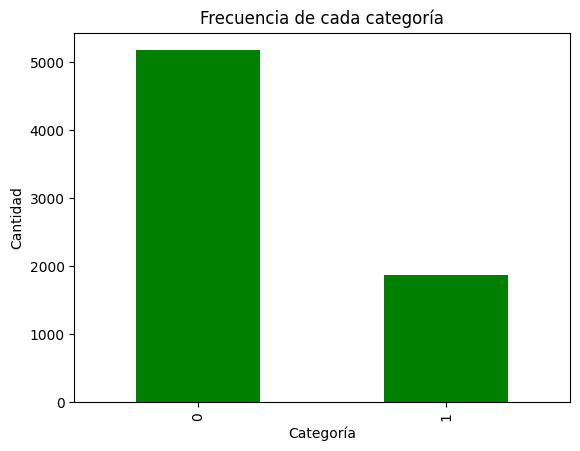

In [115]:
import matplotlib.pyplot as plt

df_telecom['Churn'].value_counts().plot(kind='bar', color='green')
plt.title('Frecuencia de cada categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.savefig("Frecuencia de cada categoría.png", dpi=300, bbox_inches='tight')
plt.show()

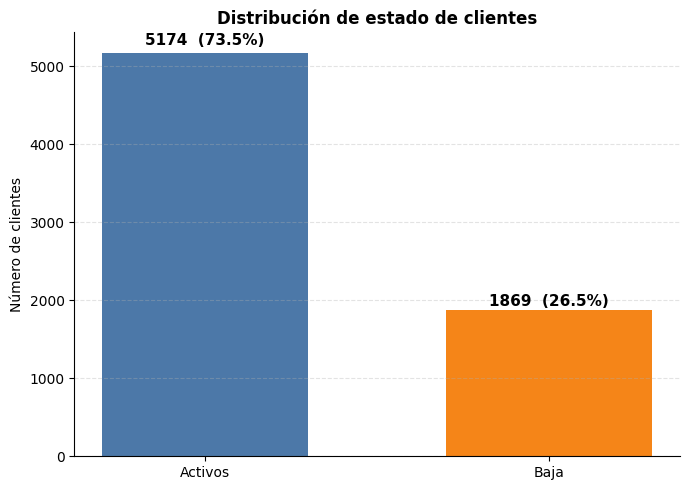

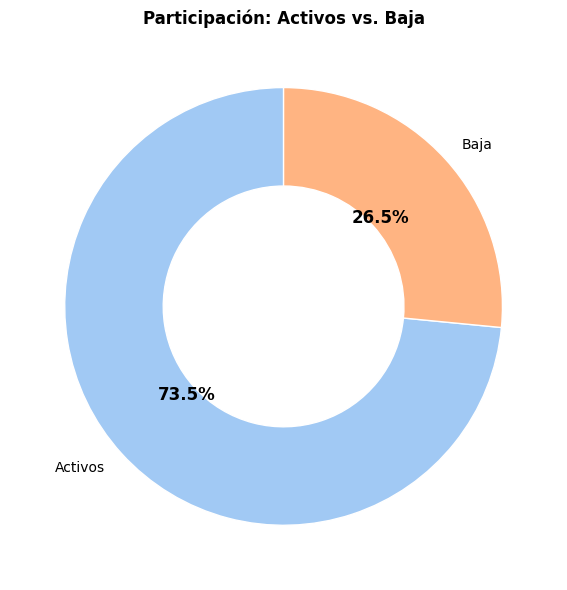

In [116]:
import numpy as np
import matplotlib.pyplot as plt

estado = (
    df_telecom['Churn']
      .astype(str).str.strip().str.title()  # '' -> '', 'yes' -> 'Yes'
      .replace({'': np.nan})
)

# Binarizamos: Yes=1, No=0
df_telecom['estado_baja'] = estado.replace({'Yes': 1, 'No': 0}).astype('Int64')

# Quitamos filas sin dato en la nueva columna
df_telecom = df_telecom.dropna(subset=['estado_baja'])

# Métricas de distribución
conteo = df_telecom['estado_baja'].value_counts().sort_index()  # 0, 1
propor = df_telecom['estado_baja'].value_counts(normalize=True).sort_index()

map_lbl = {0: 'Activos', 1: 'Baja'}
labels = [map_lbl[i] for i in conteo.index]

# Gráfico de barras con conteo y porcentaje
plt.figure(figsize=(7, 5))
colores_barras = ['#4C78A8', '#F58518']
bars = plt.bar(labels, conteo.values, width=0.6, color=colores_barras)

# Estética
plt.title('Distribución de estado de clientes', loc='center', fontsize=12, fontweight='bold')
plt.ylabel('Número de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.35)
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Anotar conteo + porcentaje en cada barra
for i, bar in enumerate(bars):
    h = bar.get_height()
    pct = propor.iloc[i] if i < len(propor) else 0
    plt.text(bar.get_x() + bar.get_width()/2, h*1.01, f'{h:.0f}  ({pct:.1%})',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Gráfico de dona
plt.figure(figsize=(6, 6))
colores_dona = ['#A1C9F4', '#FFB482']
wedges, texts, autotexts = plt.pie(
    conteo.values,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=colores_dona,
    wedgeprops=dict(width=0.45, edgecolor='white')
)

plt.setp(autotexts, fontsize=12, fontweight='bold', color='black')
plt.title('Participación: Activos vs. Baja', fontsize=12, fontweight='bold')
plt.gca().set_aspect('equal')

plt.tight_layout()
plt.savefig("Distribución de estado de clientes.png", dpi=300, bbox_inches='tight')
plt.show()


### Recuento de evasión por variables categóricas

In [ ]:
def analisis_por_categoria(df, columna, objetivo='Churn'):
    tabla = df.groupby(columna)[objetivo].agg(
        porcentaje_abandono=lambda x: round(x.mean()*100, 2),
        porcentaje_permanencia=lambda x: round((1 - x.mean())*100, 2),
        total='count'
    )
    print(f"\nAnálisis para: {columna}")
    print(tabla)
    return tabla

categorias = ['gender', 'Contract', 'PaymentMethod']
resultados = {cat: analisis_por_categoria(df_telecom, cat) for cat in categorias}



Análisis para: gender
        porcentaje_abandono  porcentaje_permanencia  total
gender                                                    
Female                26.92                   73.08   3488
Male                  26.16                   73.84   3555

Análisis para: Contract
                porcentaje_abandono  porcentaje_permanencia  total
Contract                                                          
month to month                42.71                   57.29   3875
one year                      11.27                   88.73   1473
two year                       2.83                   97.17   1695

Análisis para: PaymentMethod
                           porcentaje_abandono  porcentaje_permanencia  total
PaymentMethod                                                                
bank transfer (automatic)                16.71                   83.29   1544
credit card (automatic)                  15.24                   84.76   1522
electronic check                       

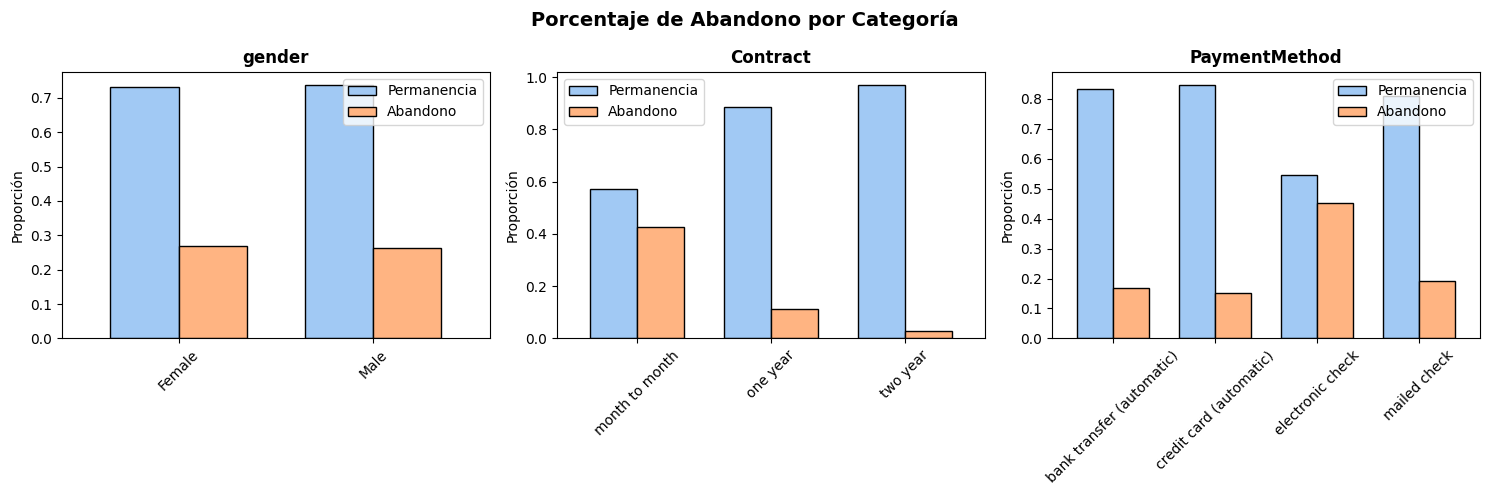

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorias = ['gender', 'Contract', 'PaymentMethod']
colors = sns.color_palette("pastel")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, cat in enumerate(categorias):
    cruzado = pd.crosstab(df_telecom[cat], df_telecom['Churn'], normalize='index')
    cruzado.plot(kind='bar', ax=axes[i], color=colors, width=0.7, edgecolor='black')

    axes[i].set_title(f'{cat}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción')
    axes[i].legend(['Permanencia', 'Abandono'])
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Porcentaje de Abandono por Categoría', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


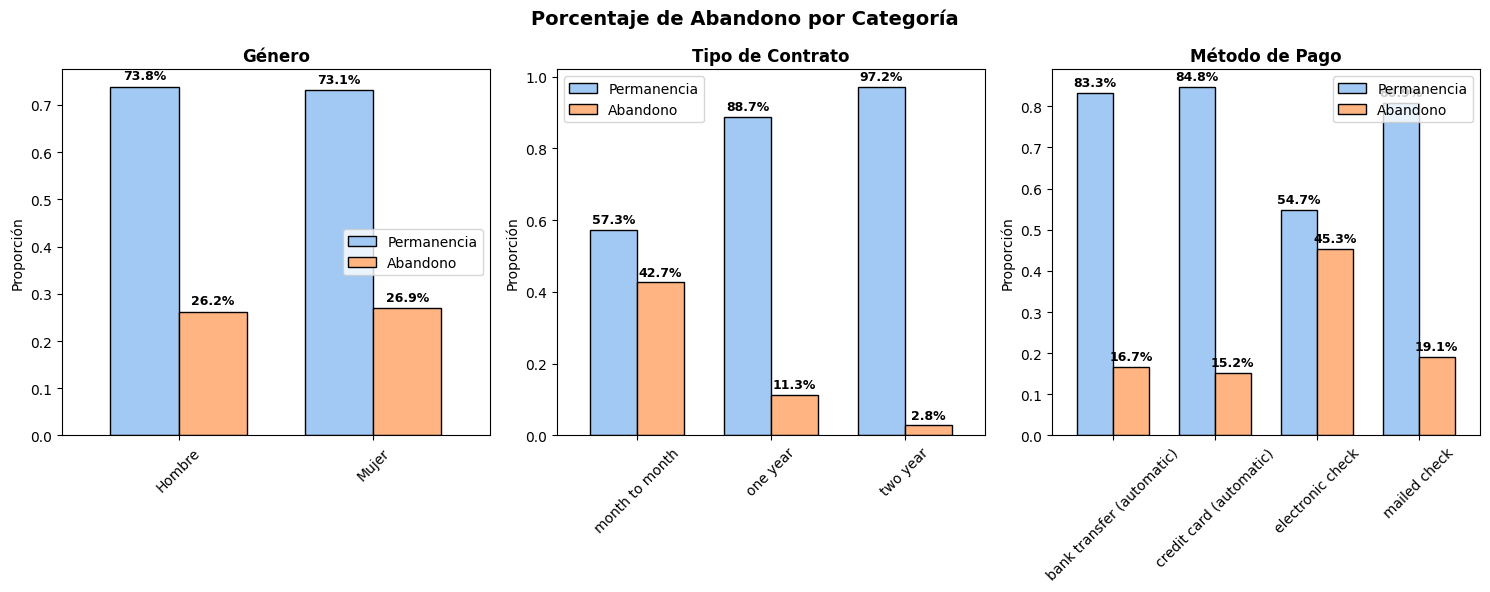

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Traducción de variables
traducciones = {
    'gender': 'Género',
    'Contract': 'Tipo de Contrato',
    'PaymentMethod': 'Método de Pago',
    'Male': 'Hombre',
    'Female': 'Mujer',

}

categorias = ['gender', 'Contract', 'PaymentMethod']
colors = sns.color_palette("pastel")

# Aplicar traducciones en el DataFrame
df_telecom_trad = df_telecom.copy()
df_telecom_trad.replace(traducciones, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

for i, cat in enumerate(categorias):
    nombre_cat = traducciones.get(cat, cat)  # Traducción del nombre de columna
    cruzado = pd.crosstab(df_telecom_trad[cat],
                          df_telecom_trad['Churn'], normalize='index')

    plot = cruzado.plot(kind='bar', ax=axes[i], color=colors, width=0.7, edgecolor='black')

    # Título y ejes en español
    axes[i].set_title(nombre_cat, fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción')
    axes[i].legend(['Permanencia', 'Abandono'])
    axes[i].tick_params(axis='x', rotation=45)

    # Etiquetas de porcentaje
    for p in plot.patches:
        value = f"{p.get_height()*100:.1f}%"
        axes[i].text(
            p.get_x() + p.get_width() / 2,
            p.get_height() + 0.01,
            value,
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

plt.suptitle('Porcentaje de Abandono por Categoría', fontsize=14, weight='bold')
plt.tight_layout()
# Guardar imagen
plt.savefig("Porcentaje de Abandono por Categoría.png", dpi=300, bbox_inches='tight')
plt.show()
plt.show()

### Conteo de evasión por variables numéricas

In [ ]:
conteo = df_telecom.groupby('Churn')['Charges.Total'].agg(['mean', 'max', 'min', 'std']).reset_index()

In [ ]:
conteo

,Churn,mean,max,min,std
0,0,2555.344141,8672.45,18.80,2329.456984
1,1,1531.796094,8684.80,18.85,1890.822994


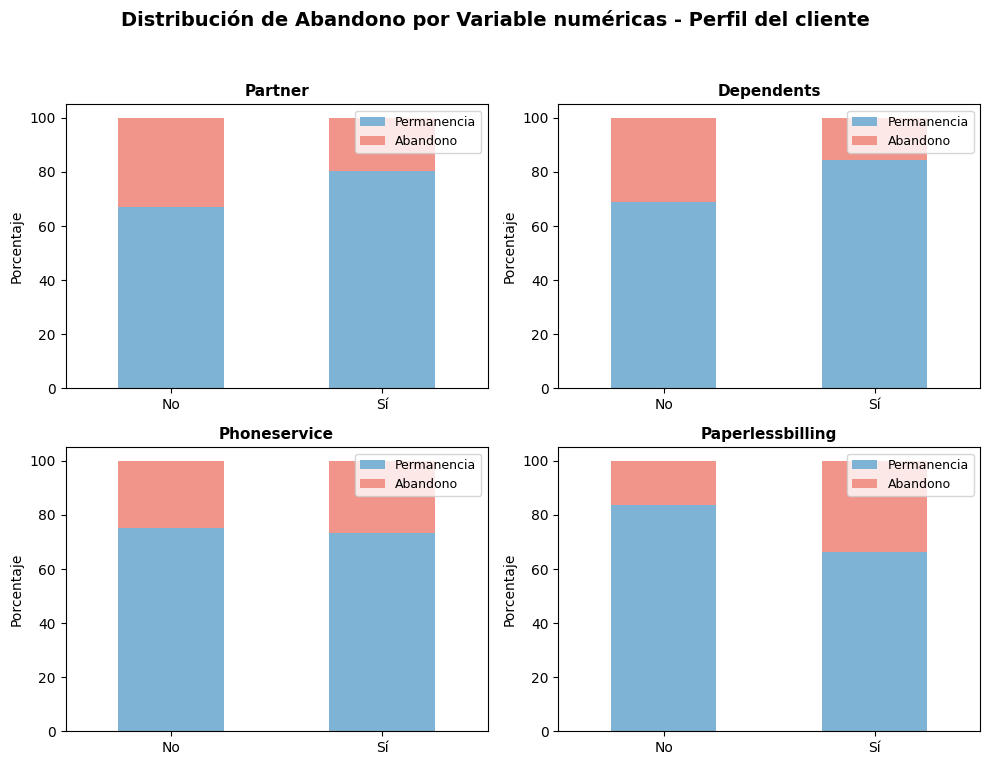

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de columnas binarias
col_binario = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, col in enumerate(col_binario):
    df_temp = df_telecom.copy()
    # Mapear 0/1 a Sí / No
    df_temp[col] = df_temp[col].map({1: 'Sí', 0: 'No'})

    # Cruzar con columna de abandono
    cruzado = pd.crosstab(df_temp[col], df_temp['Churn'], normalize='index') * 100

    if 0 in cruzado.columns and 1 in cruzado.columns:
        cruzado.columns = ['Permanencia', 'Abandono']
    elif 0 in cruzado.columns:
        cruzado.columns = ['Permanencia']
    elif 1 in cruzado.columns:
        cruzado.columns = ['Abandono']
    else:

        continue

    # Gráfico apilado
    plot = cruzado.plot(kind='bar', stacked=True, color=['#7FB3D5', '#F1948A'], ax=axes[idx])

    axes[idx].set_title(col.replace("_", " ").capitalize(), fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Porcentaje')
    axes[idx].set_xlabel('')
    axes[idx].legend(loc='best', fontsize=9)
    axes[idx].tick_params(axis='x', rotation=0)

plt.suptitle('Distribución de Abandono por Variable numéricas - Perfil del cliente', fontsize=14, weight='bold', ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Distribución de Abandono por Variable numéricas.png", dpi=300, bbox_inches='tight')
plt.show()

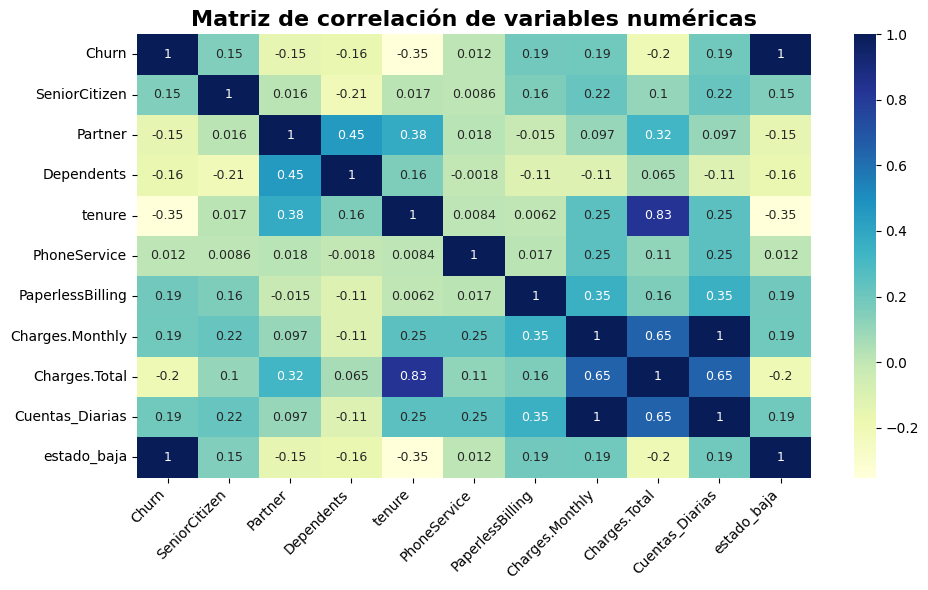

In [118]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_telecom.corr(numeric_only=True),
    annot=True,
    cmap="YlGnBu",
    annot_kws={"size": 9}
)
plt.title("Matriz de correlación de variables numéricas", fontsize=16, weight='bold', ha='center')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("Matriz de correlación de variables numéricas.png", dpi=300, bbox_inches='tight')
plt.show()


#📄Informe final

### 🔹 Introducción:

El presente informe tiene como finalidad examinar en profundidad los factores que influyen en la evasión de clientes dentro de la compañía de telecomunicaciones. La pérdida de clientes (o churn) representa un reto estratégico, ya que retener a un cliente existente suele ser más rentable que adquirir uno nuevo.

A través del análisis de datos históricos, se buscó identificar patrones de comportamiento y variables que inciden en la decisión de abandono, con el propósito de anticipar posibles cancelaciones y diseñar estrategias efectivas para aumentar la retención.

### 🔹 Limpieza y Tratamiento de Datos

Una vez que se han importado los datos del enlace proporcionado en la página de GitHub con formato Json, se procedio a manipularlos utilizando las bibliotecas: pandas, numpy, seaborn y matplotlib.pyplot, con el objetivo de procesarlos

### 🔹 Análisis Exploratorio de Datos

Como parte del proceso analítico, se desarrolló un Análisis Exploratorio de Datos para comprender la distribución de variables y la relación entre ellas, utilizando representaciones visuales y métricas descriptivas. Entre las principales acciones y hallazgos se destacan:

1.  **Distribución de evasión**


*  Se representó la proporción de clientes que permanecen frente a los que abandonan, mediante gráficos de barras y de dona, evidenciando que la evasión representa un porcentaje significativo sobre el total de clientes.

2.   **Relación con variables categóricas**


* Se evaluó la evasión por categorías como género, tipo de contrato y método de pago, observando que el contrato mensual y ciertos métodos de pago electrónicos tienen una mayor asociación con el abandono.

3. **Análisis de variables binarias**

* Se analizaron factores como tener pareja, dependientes, servicio telefónico, factura electrónica y otros, detectando patrones en la propensión al abandono dependiendo de la respuesta (Sí/No).

4. **Correlación entre variables numéricas**

* Mediante un mapa de calor (heatmap) se identificaron correlaciones significativas entre variables como meses en la compañía, cargos mensuales y cargos totales con la variable de evasión.

* Se destacaron las correlaciones más fuertes para priorizar variables relevantes en futuros modelos predictivos.

5. **Cruces porcentuales**

* Se emplearon gráficos apilados y tablas de contingencia para visualizar la proporción de abandono dentro de cada categoría, lo que permitió identificar segmentos con mayor riesgo.

Este EDA permitió obtener una comprensión más clara del comportamiento de los clientes y de los factores más influyentes en la evasión, sentando las bases para las conclusiones y recomendaciones estratégicas del presente informe.

### 🔹Principales Hallazgos

Tras aplicar análisis exploratorio, cruces categóricos y visualizaciones, se identificaron patrones relevantes:

- **Tipo de contrato**

Los contratos mensuales presentan una tasa de abandono significativamente mayor que los contratos anuales o bianuales.

Esto sugiere menor compromiso y más flexibilidad para cancelar.

- **Método de pago**

Los pagos electrónicos y no automáticos se asocian con una mayor probabilidad de cancelación.

Los pagos automáticos parecen fomentar permanencia, posiblemente por comodidad.

- **Perfil del cliente**

Clientes que viven solos o sin dependientes muestran más propensión a abandonar.

Adultos mayores presentan menor evasión, pero pueden abandonar por baja interacción con el servicio o dificultades técnicas.

- **Antigüedad y lealtad**

Existe una correlación positiva entre el tiempo en la compañía y la permanencia.

Los primeros meses son el periodo más crítico para evitar la pérdida.

- **Uso y gasto**

Clientes con alto gasto total no siempre permanecen, lo que sugiere que el valor percibido no está alineado con la inversión realizada.

La contratación de servicios adicionales (TV, internet, soporte técnico) tiende a reforzar la fidelidad.

- **Factura electrónica**

Se observa una ligera tendencia a mayor evasión entre usuarios que optan por factura electrónica, lo que podría estar vinculado a un perfil más exigente o digitalizado.





### 🔹 Recomendaciones Estratégicas

A partir de los hallazgos, se proponen acciones concretas:

- Fidelización temprana: programas de bienvenida y atención proactiva durante los primeros meses para reducir el riesgo inicial.

- Incentivos para contratos largos: descuentos, beneficios exclusivos o planes combinados para motivar el cambio desde contratos mensuales a anuales.

- Educación digital y soporte: asesorías y acompañamiento para clientes con menor conocimiento tecnológico, especialmente adultos mayores.

- Campañas preventivas: identificación temprana de clientes en riesgo mediante patrones detectados (contrato mensual, sin dependientes, pago no automático).

- Optimización de valor percibido: revisar la estructura de precios y reforzar la comunicación de beneficios en segmentos de alto gasto.

- Análisis de experiencia digital: evaluar la interfaz y usabilidad para usuarios con factura electrónica, eliminando posibles puntos de fricción.

- Servicios adicionales como ancla: fomentar la contratación de servicios complementarios que fortalezcan la relación con la marca.

### 🔹Conclusión


El análisis confirma que la evasión de clientes está influenciada por una combinación de factores contractuales, de pago, demográficos y de uso del servicio. La retención efectiva requiere un enfoque integral que combine estrategias comerciales, de servicio al cliente y de experiencia de usuario.

Implementar estas acciones no solo puede reducir la tasa de abandono, sino también mejorar la percepción de valor y la satisfacción general, consolidando una base de clientes más leal y comprometida.